In [6]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [7]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [8]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [9]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [10]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [15]:
!pip install six

In [16]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

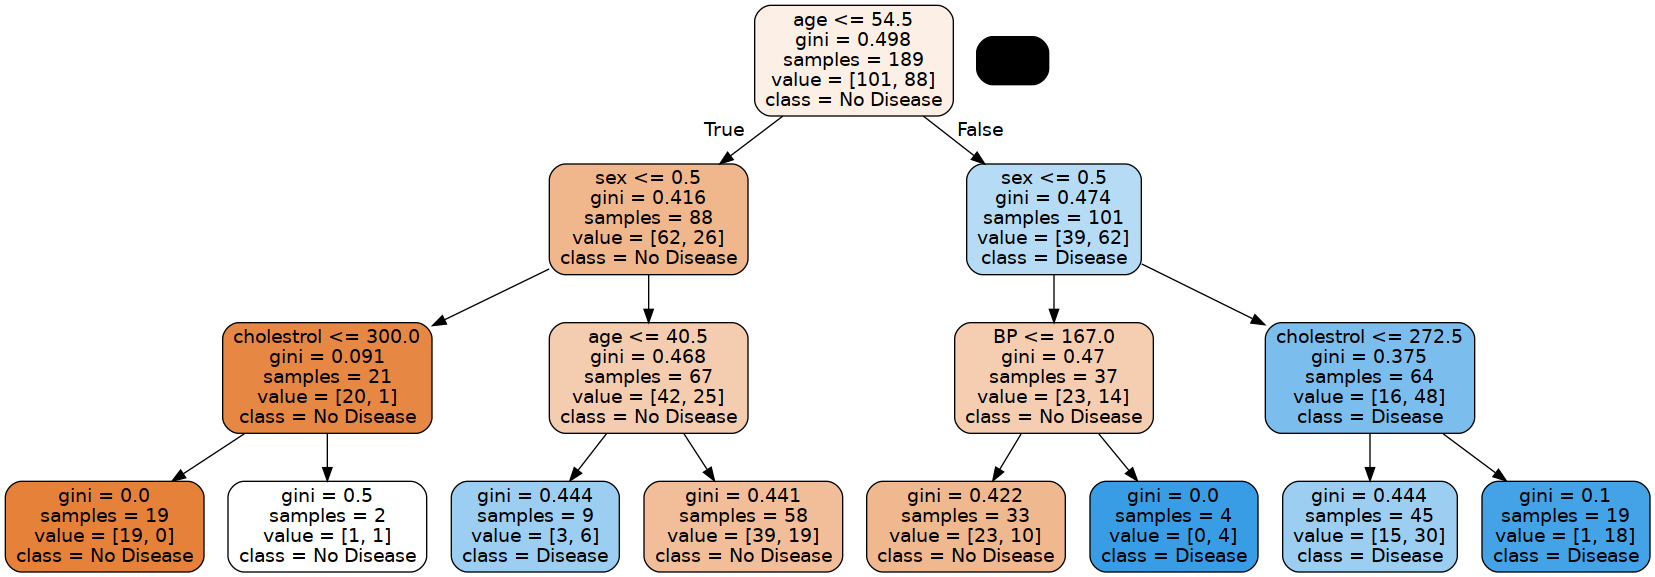

In [17]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

#### Evaluating model performance

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [21]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])

#### Create helper functions to evaluate the model performance and create the graph

In [22]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()  

    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True,
                    feature_names=X.columns, 
                    class_names=['No Disease', "Disease"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph
    

In [23]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train set performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print("-"*50)
    print("Test set performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))
    

In [25]:
evaluate_model(dt)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


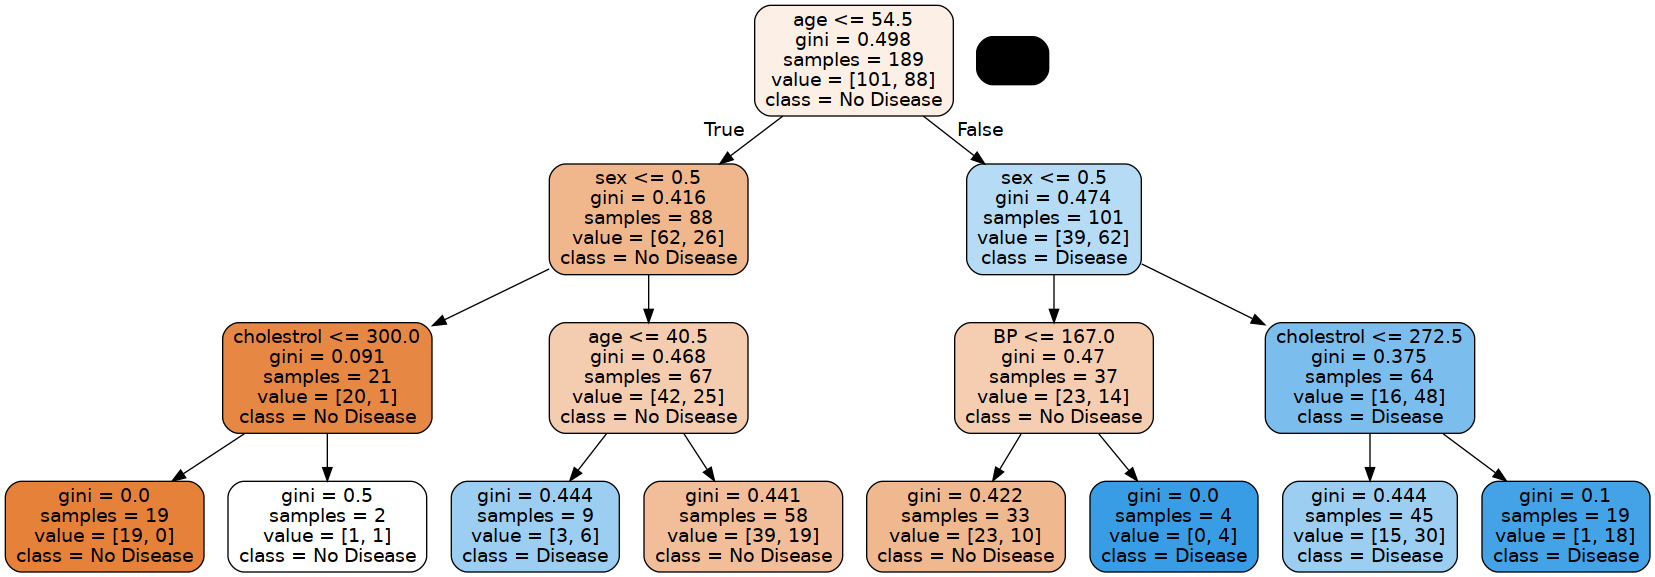

In [27]:
gph = get_dt_graph(dt)
Image(gph.create_png())

#### Decision Tree without any hyper-parameter setting

In [29]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

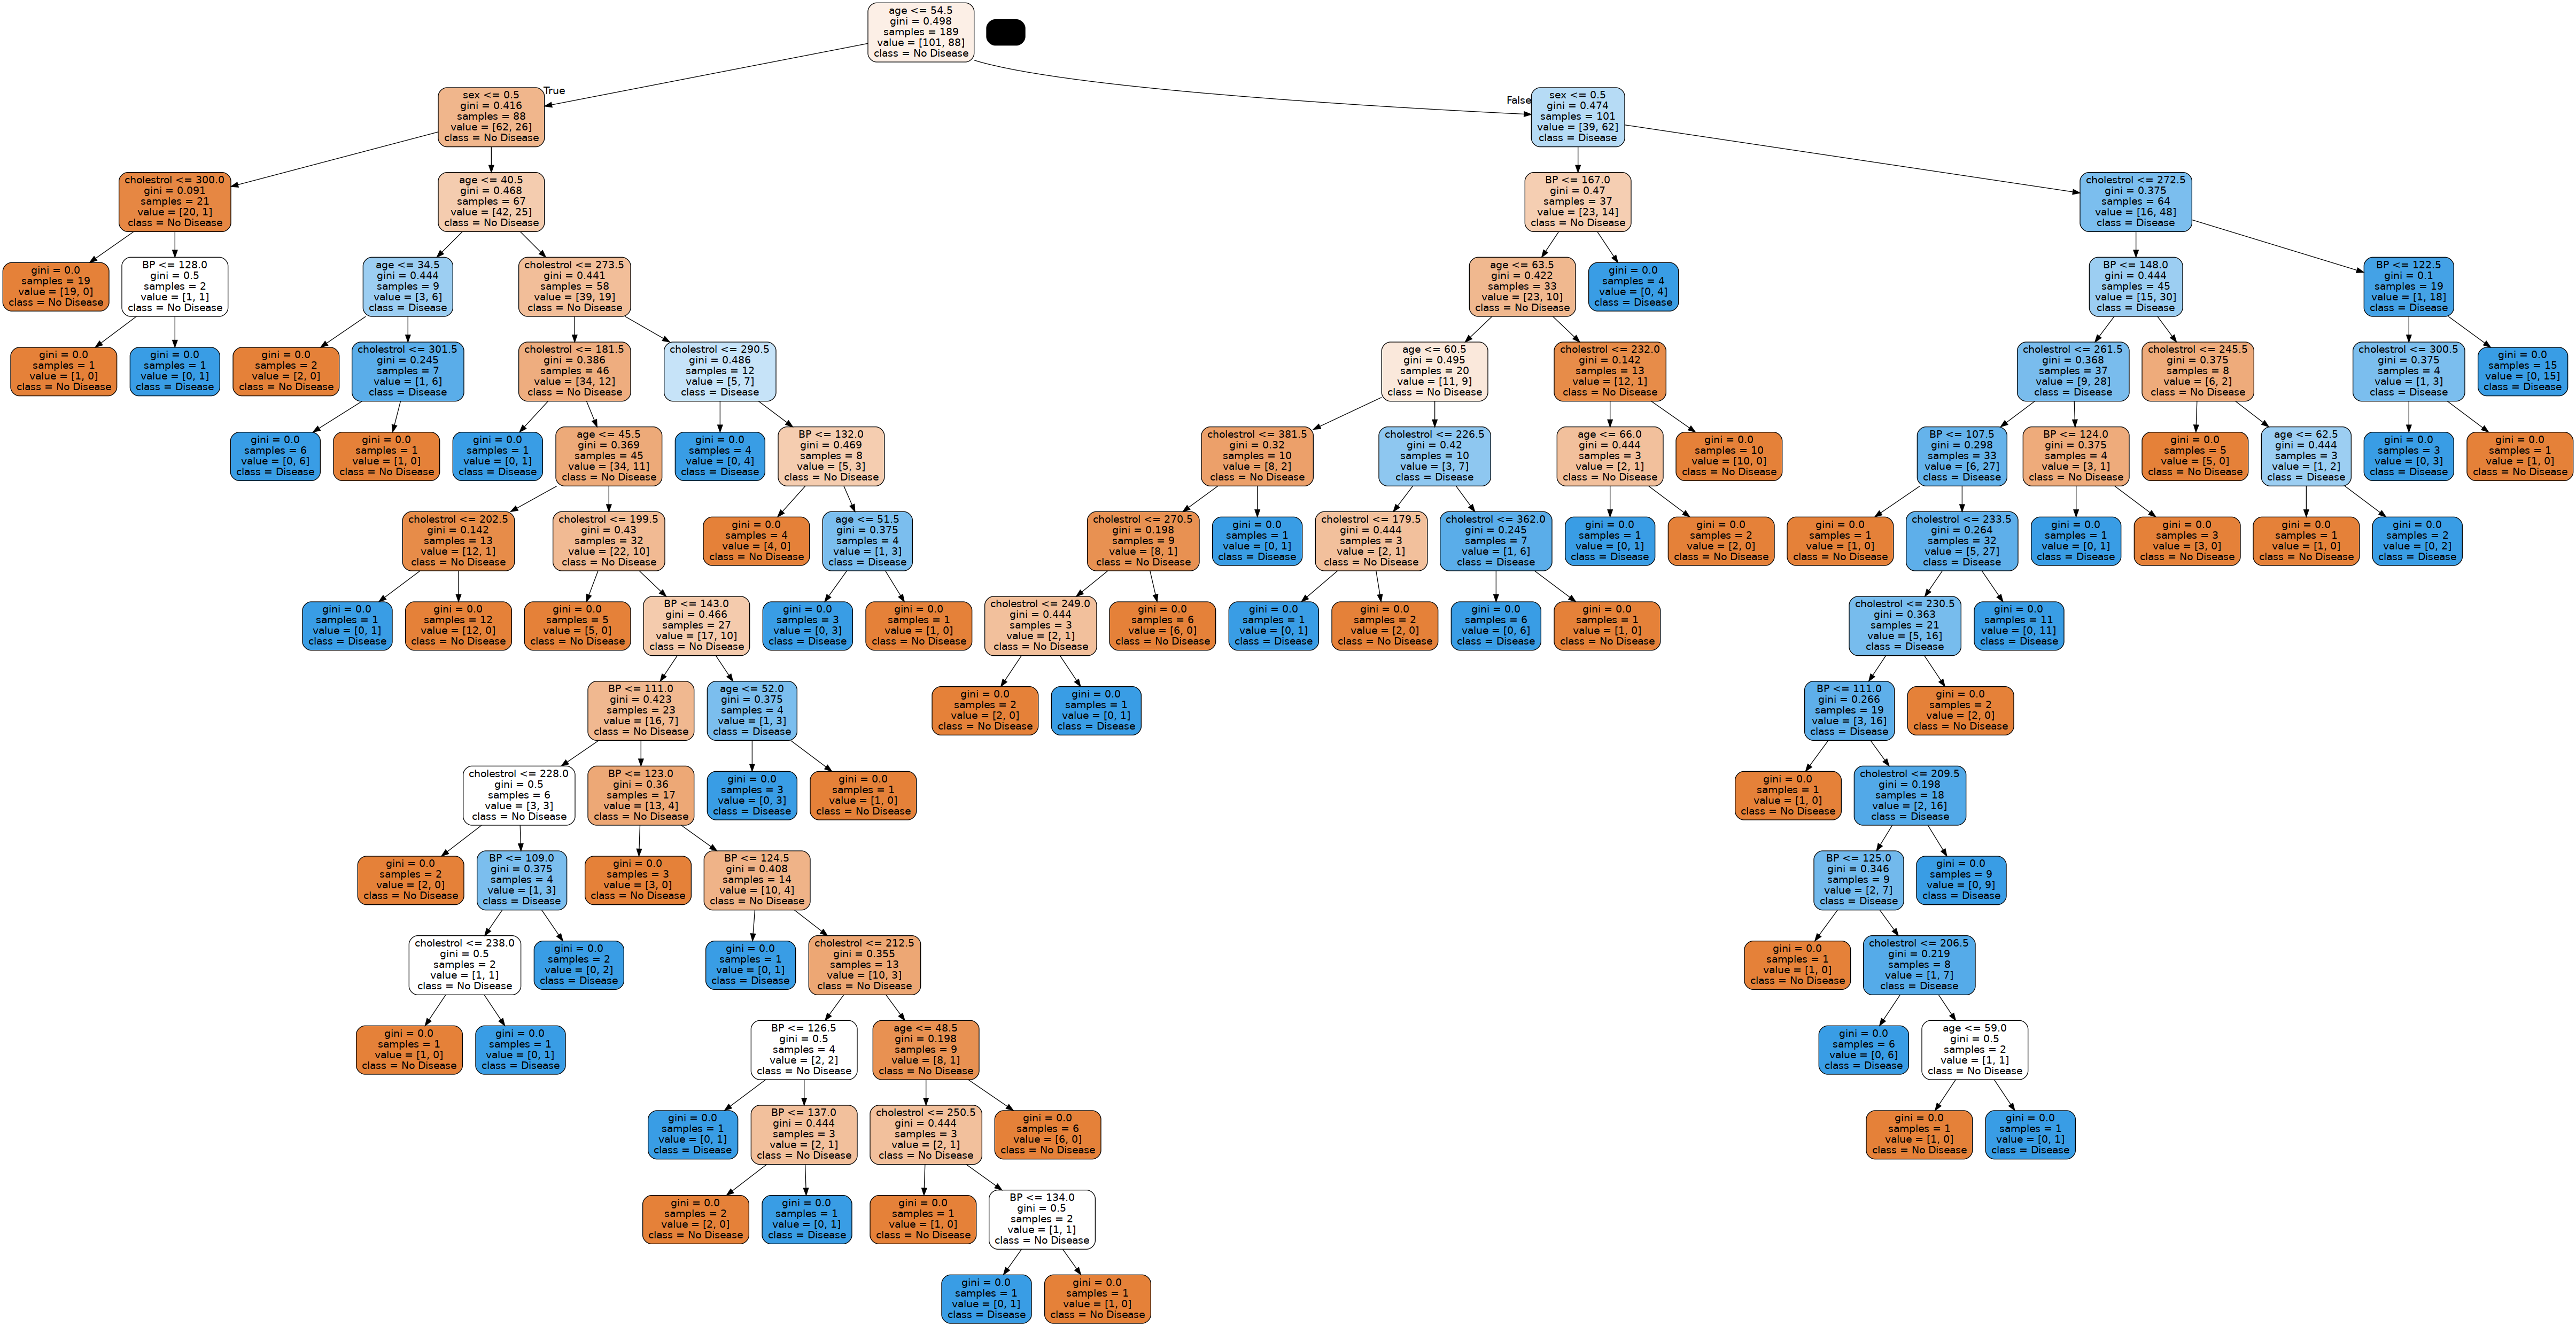

In [31]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [32]:
evaluate_model(dt_default)

Train set performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set performance
0.6296296296296297
[[31 18]
 [12 20]]


As we can see the that model is overfitting the training data which is unacceptable.

#### Controlling the depth of the tree

In [34]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

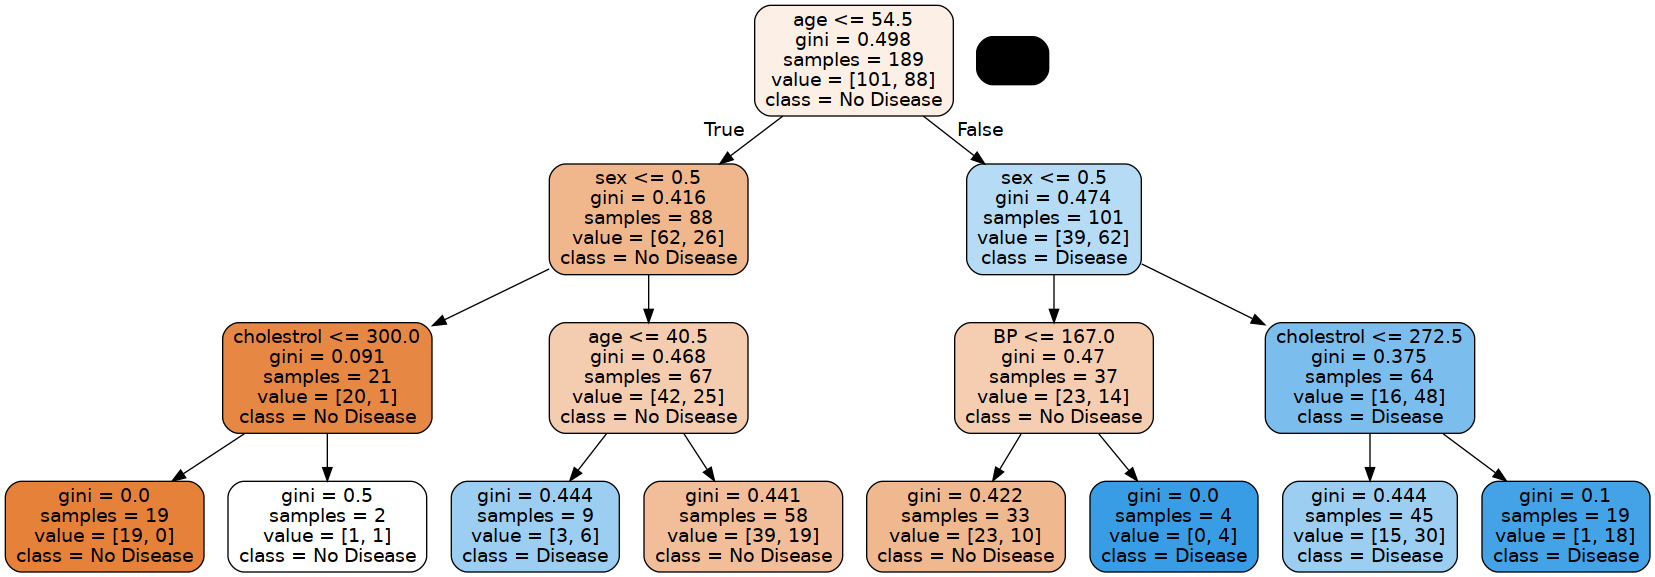

In [35]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [36]:
evaluate_model(dt_depth)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


Their is huge loss of accuracy from train (74%) to Test (60%) dataset, which is certainly makes it a bad model.

#### Specifying the minimum samples before the split

In [38]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

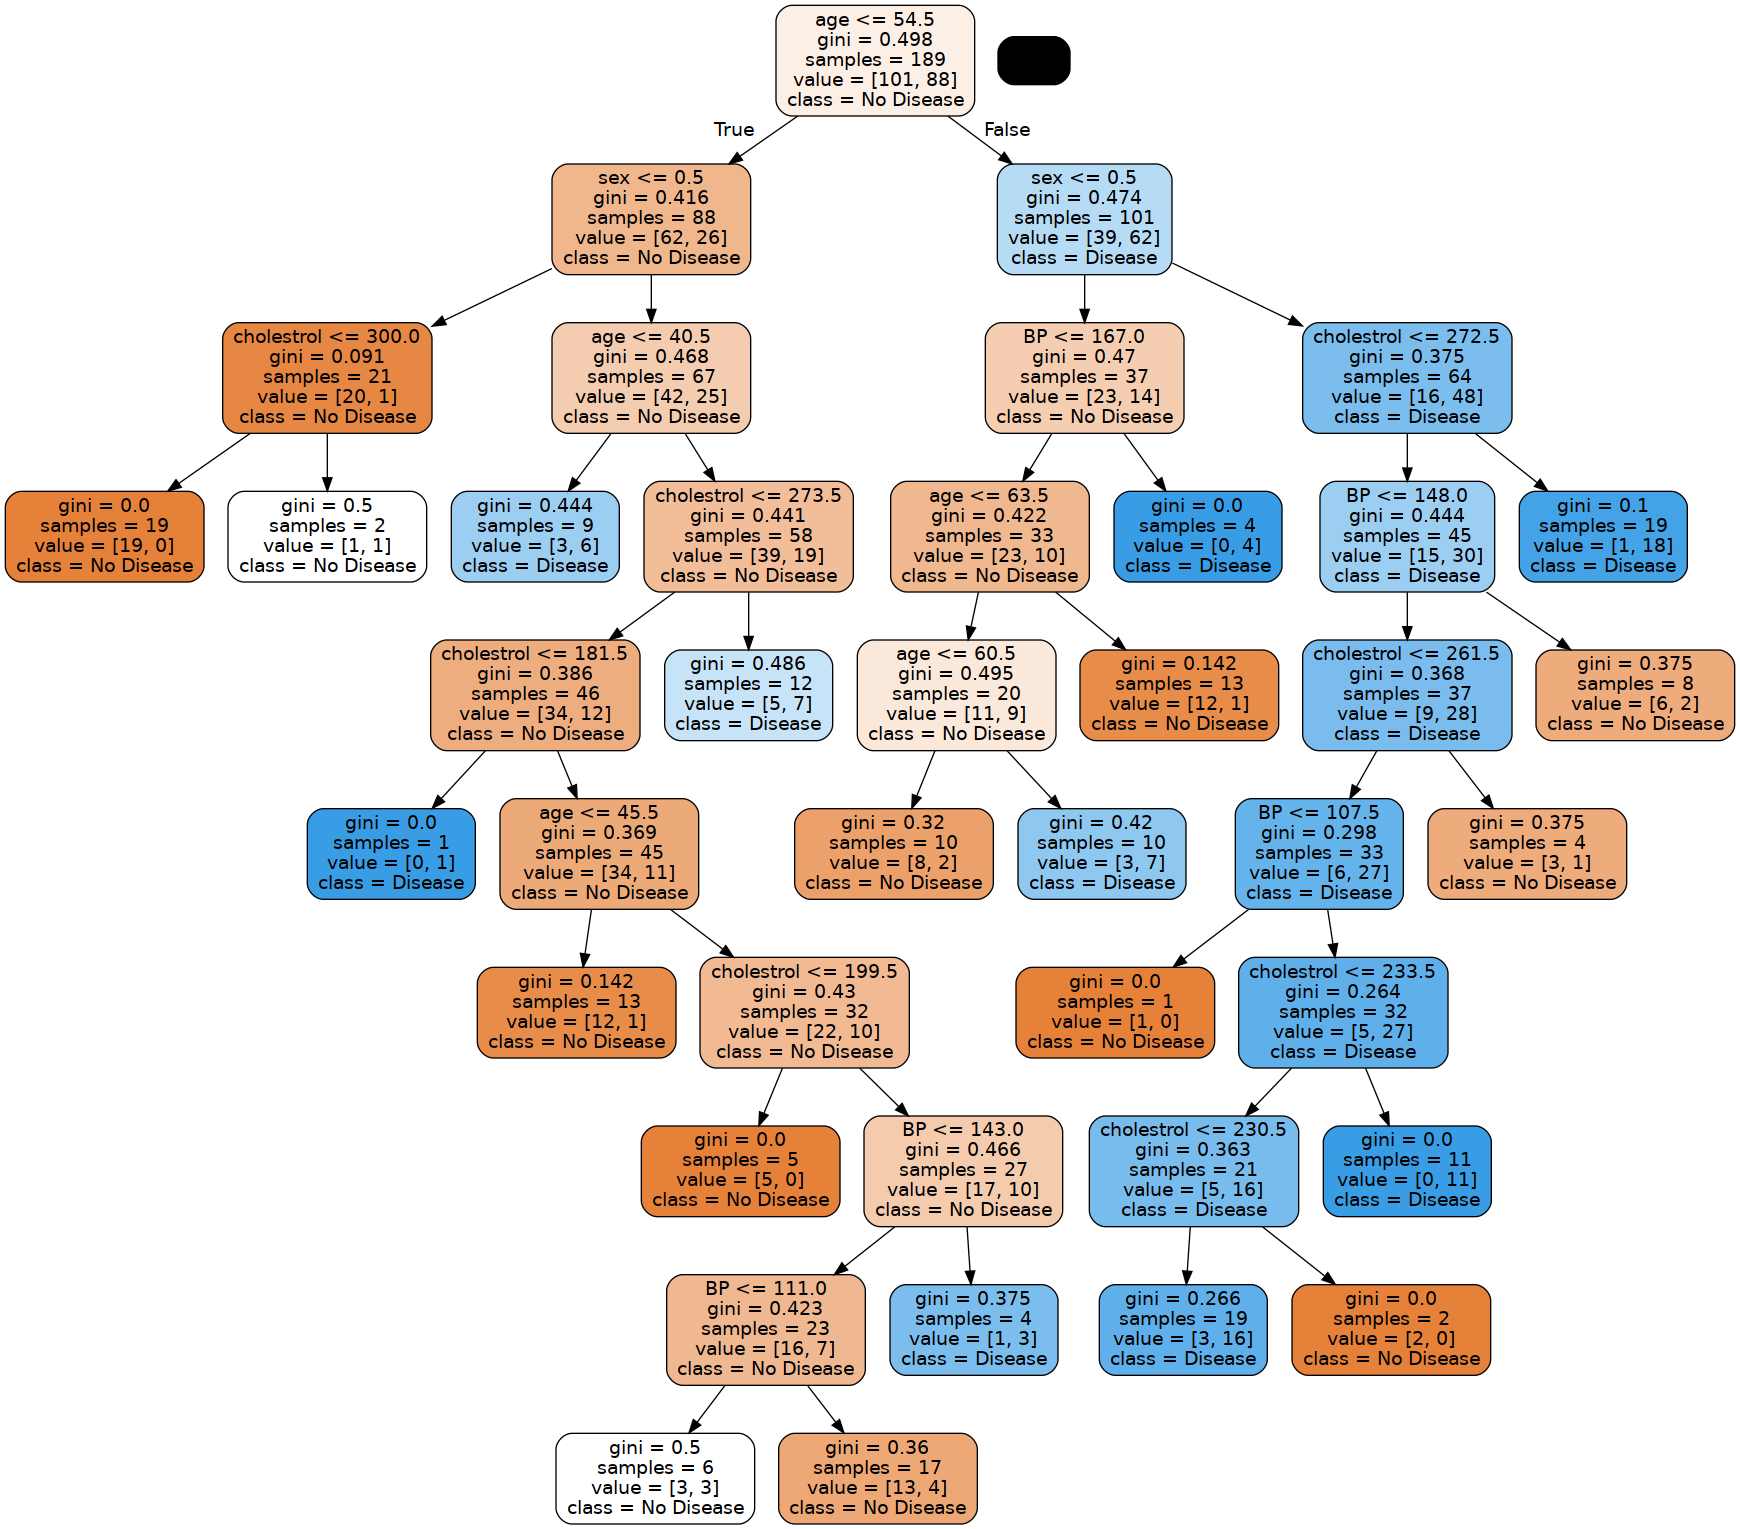

In [39]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [40]:
evaluate_model(dt_min_split)

Train set performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[32 17]
 [12 20]]


Their is huge loss of accuracy from train (83%) to Test (64%) dataset, which is certainly makes it a bad model.

#### Specifying the minimum samples in leaf node

In [42]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

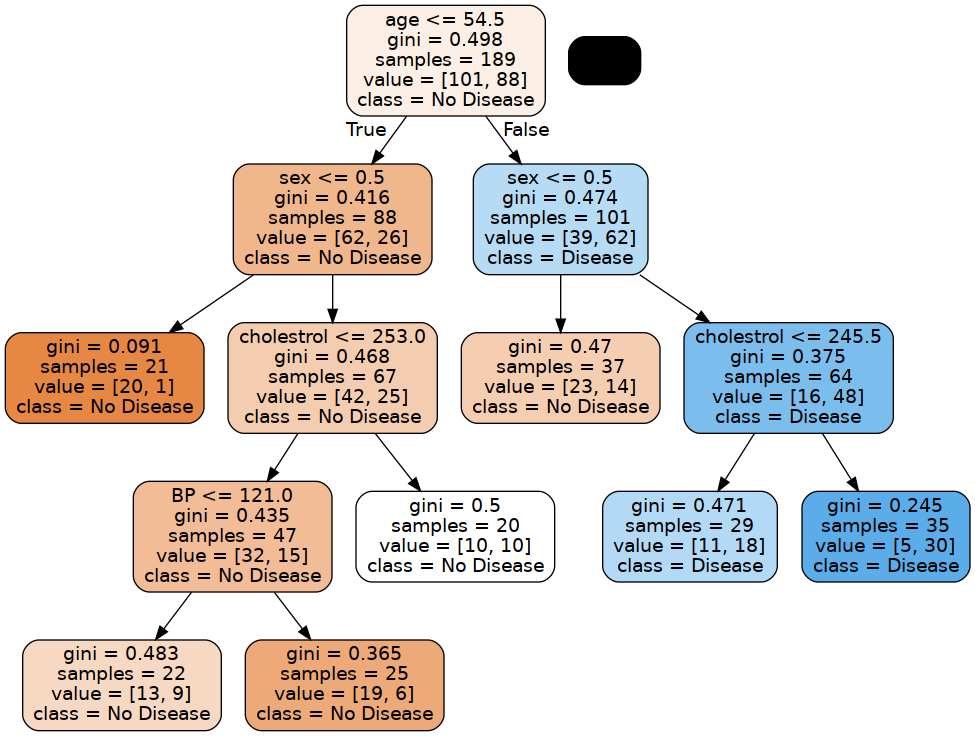

In [43]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [44]:
evaluate_model(dt_min_leaf)

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


This model performing much better than previous model with minimum loss in accuracy (by 6%) from train to test dataset

#### Hyper-parameter tuning using Grid search CV

In [45]:
dt = DecisionTreeClassifier(random_state=42)

In [47]:
from sklearn.model_selection import GridSearchCV

In [51]:
params = {
    "max_depth" : [2,3,5,20],
    "min_samples_leaf": [5,10,20,50,100],
    "criterion": ["gini","entropy"]
}

In [52]:
grid_search = GridSearchCV(estimator=dt,
                          param_grid=params,
                          cv=4,
                          n_jobs=-1,verbose=1,
                          scoring="accuracy")

In [53]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits
CPU times: user 200 ms, sys: 107 ms, total: 307 ms
Wall time: 1.61 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [56]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005541,0.002647,0.002331,0.000312,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,14
1,0.004578,0.001137,0.002308,0.000422,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,14
2,0.002979,0.000525,0.001771,0.000242,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,17
3,0.003293,0.000317,0.002016,0.000095,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.002962,0.000078,0.001856,0.000096,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,33


In [58]:
cv_df.shape

(40, 15)

In [59]:
cv_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
25,0.002893,0.000067,0.001871,0.000049,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.003042,0.000081,0.001890,0.000065,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.003293,0.000317,0.002016,0.000095,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.002946,0.000147,0.001924,0.000018,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.002112,0.000425,0.001472,0.000336,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [61]:
dt_best = grid_search.best_estimator_

In [62]:
evaluate_model(dt_best)

Train set performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set performance
0.6172839506172839
[[36 13]
 [18 14]]


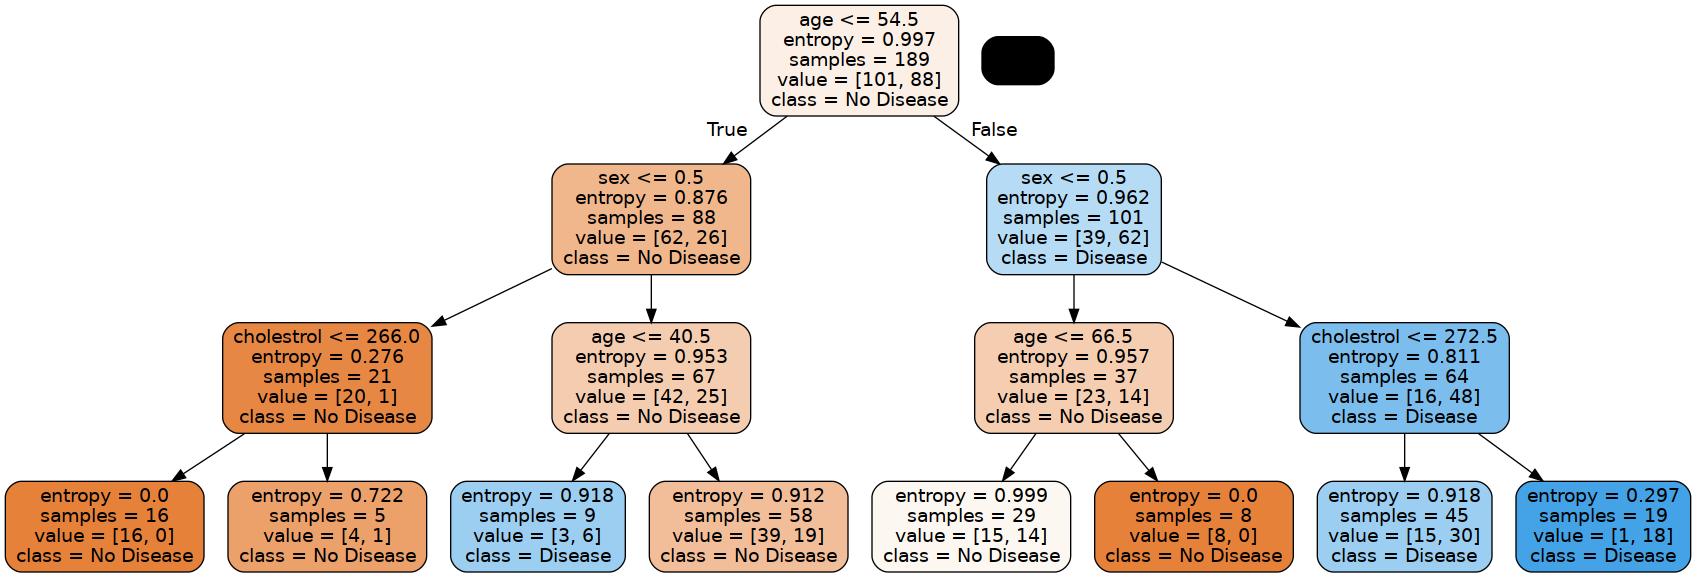

In [63]:
grph = get_dt_graph(dt_best)
Image(grph.create_png())